In [55]:
#from wordcloud import WordCloud, STOPWORDS

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_theme(style="dark") # cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
plt.style.use('Solarize_Light2')# establece el estilo en Solarize_Lihgt2. 

# Realizar los distintos test
# ------------------------------------------------------------------------------
from scipy import stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway, shapiro, kstest
from sklearn.linear_model import LinearRegression

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Fase I: Exploración y limpieza

In [56]:
# importamos los ficheros con la información
df_clh = pd.read_csv("Customer_Loyalty_History.csv")
df_cfa = pd.read_csv("Customer_Flight_Activity.csv")


### Análisis del dataframe df_clh <span style="color:#D4AF37">**Customer Loyalty History**</span>:

Los datos y títulos de las columnas de este conjunto de datos sugien que este fichero contiene:
 - la **tarjeta de fidelización** columna *Loyalty_Card*: Star, Nova, Aurora según el programa de fidelización respectivo.
 - el **historial de suscripción** a la tarjeta de fidelización: tipo, año y mes de alta y baja de la tarjeta.
  - los **datos personales** de las personas que tienen la tarjeta de fidelización del estudio: dirección, educación, salario, estado civil y el Valor de Vida del Cliente ***CLV**: métrica para comprender el beneficio neto que se puede espera de la relación con un cliente a lo largo del tiempo. Será una variable creciente (a mayor CLV, mayor beneficio)*

In [57]:
df_clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [58]:
# reemplazo los espacios del título de las columnas por _ para mejor manejo y comprensión
df_clh.columns = df_clh.columns.str.replace(' ', '_')
df_clh.head()

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [59]:
# información
df_clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty_Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal_Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital_Status      16737 non-null  object 
 9   Loyalty_Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment_Type     16737 non-null  object 
 12  Enrollment_Year     16737 non-null  int64  
 13  Enrollment_Month    16737 non-null  int64  
 14  Cancellation_Year   2067 non-null   float64
 15  Cancellation_Month  2067 non-null   float64
dtypes: f

In [60]:
# Identificar valores duplicados
print (f"El número de duplicados en el dataframe de Loyalty History es {df_clh.duplicated().sum()}")
print("No tenemos que gestionar duplicados porque no los hay.")

El número de duplicados en el dataframe de Loyalty History es 0
No tenemos que gestionar duplicados porque no los hay.


In [61]:
#Estadísticas descriptivas básicas
df_clh.describe()

,Loyalty_Number,Salary,CLV,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [62]:
# Vemos negativo en la columna Salary, lo tratamos en gestión de nulos

In [63]:
# Identificar y tratar valores nulos
df_clh.isnull().sum()

Loyalty_Number            0
Country                   0
Province                  0
City                      0
Postal_Code               0
Gender                    0
Education                 0
Salary                 4238
Marital_Status            0
Loyalty_Card              0
CLV                       0
Enrollment_Type           0
Enrollment_Year           0
Enrollment_Month          0
Cancellation_Year     14670
Cancellation_Month    14670
dtype: int64

**Gestión de nulos**

> *Assumption 1*: 
<span style="color:#D4AF37">**Cancellation_Year**</span> y <span style="color:#D4AF37">**Cancellation_Month**</span> contienen nulos (vacíos). Esto sugiere la interpretación de que *la tarjeta de fidelización sigue activa* y no ha sido cancelada.
    >   - creamos la columna<span style="color:#D4AF37">**Loyalty_Card_Status**</span> para capturar este razonamiento
    >   - sustituimos valores nulos por la convención **9999 para año y 0 para mes**, teniendo esto en cuenta en futuros análisis.

> *Assumption 2*: 
<span style="color:#D4AF37">**Salary**</span> aparecen dos tipos de nulos:
    >- **salarios negativos**: se clasifican como NaN, suponen 20 valores de la totalidad. Sugiere datos incorrectos.
    >- **salarios nulos** son datos sin completar (vacío). Esto sugiere que son **datos desconocidos** para la empresa. Estos nulos suponen un 25.32% de la totalidad de los datos, por lo que:
> Optamos por transformar ambos datos a nan ==> 25.44% de datos nulos en total
> Creamos la columna <span style="color:#D4AF37">**Salary_Info**</span> para capturar la información de si el salario es conocido o desconocido.

In [64]:
# Crear una nueva columna 'Salary_Info' para indicar si el salario es conocido o no conocido, contemplando nulos y negativos como 'Unknown'
df_clh['Salary_Info'] = np.where((df_clh['Salary'].isnull()) | (df_clh['Salary'] < 0), 'Unknown', 'Known')


In [65]:
# Calcular la cantidad de datos negativos en la columna Salary
salary_neg = (df_clh['Salary'] < 0).sum()
print(f"Tenemos {salary_neg} datos en la columna Salary con valores negativos")

Tenemos 20 datos en la columna Salary con valores negativos


In [66]:
# Convertir los valores nulos y negativos en la columna 'salary' a NaN
df_clh['Salary'] = np.where((df_clh['Salary'].isnull()) | (df_clh['Salary'] < 0), np.nan, df_clh['Salary'])

In [67]:
# Analizar qué % de nulos suponen sobre la totalidad de salarios
porcentaje_nulos = (df_clh['Salary'].isnull().sum() / len(df_clh['Salary'])) * 100
print(f"El porcentaje total de valores nulos en la columna 'Salary' es: {porcentaje_nulos:.2f}%")

El porcentaje total de valores nulos en la columna 'Salary' es: 25.44%


In [68]:
# Crear una nueva columna 'Loyalty_Card_Status'
df_clh['Loyalty_Card_Status'] = df_clh['Cancellation_Year'].apply(lambda x: 'Active' if pd.isnull(x) else 'Inactive')
df_clh.head()

,Loyalty_Number,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Salary_Info,Loyalty_Card_Status
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,Known,Active
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,Unknown,Active
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,Unknown,Inactive
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,Unknown,Active
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,Known,Active


In [69]:
# gestionamos nulos cambiando por nan
df_clh['Cancellation_Year'] = np.where((df_clh['Cancellation_Year'].isnull()), np.nan, df_clh['Cancellation_Year'])
df_clh['Cancellation_Month'] = np.where((df_clh['Cancellation_Month'].isnull()), np.nan, df_clh['Cancellation_Month'])

In [70]:
df_clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loyalty_Number       16737 non-null  int64  
 1   Country              16737 non-null  object 
 2   Province             16737 non-null  object 
 3   City                 16737 non-null  object 
 4   Postal_Code          16737 non-null  object 
 5   Gender               16737 non-null  object 
 6   Education            16737 non-null  object 
 7   Salary               12479 non-null  float64
 8   Marital_Status       16737 non-null  object 
 9   Loyalty_Card         16737 non-null  object 
 10  CLV                  16737 non-null  float64
 11  Enrollment_Type      16737 non-null  object 
 12  Enrollment_Year      16737 non-null  int64  
 13  Enrollment_Month     16737 non-null  int64  
 14  Cancellation_Year    2067 non-null   float64
 15  Cancellation_Month   2067 non-null  

In [71]:
# Veamos ahora el número de registros únicos
df_clh.nunique()

Loyalty_Number         16737
Country                    1
Province                  11
City                      29
Postal_Code               55
Gender                     2
Education                  5
Salary                  5870
Marital_Status             3
Loyalty_Card               3
CLV                     7984
Enrollment_Type            2
Enrollment_Year            7
Enrollment_Month          12
Cancellation_Year          6
Cancellation_Month        12
Salary_Info                2
Loyalty_Card_Status        2
dtype: int64

In [72]:
# Imprimir los registros únicos de las columnas clave
print(f"El país de análisis es {df_clh['Country'].unique()}")
print(F"Los géneros que se muestran son: {df_clh['Gender'].unique()}")
print(F"Los niveles de educación de la muestra son: {df_clh['Education'].unique()}")
print(F"Los estados civiles de la muestra son: {df_clh['Marital_Status'].unique()}")
print(F"Los tipos de tarjeta de fidelización son: {df_clh['Loyalty_Card'].unique()}")

El país de análisis es ['Canada']
Los géneros que se muestran son: ['Female' 'Male']
Los niveles de educación de la muestra son: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Los estados civiles de la muestra son: ['Married' 'Divorced' 'Single']
Los tipos de tarjeta de fidelización son: ['Star' 'Aurora' 'Nova']


### Análisis del dataframe df_cfa <span style="color:#D4AF37">**Customer Flight Activity**</span>:

Los datos y títulos de las columnas de este conjunto de datos sugien que este fichero contiene:
 - el **historial de vuelos** de las personas que utilizaron la tarjeta de fidelización del estudio **agrupados por mes y año**:
    - vuelos totales (suma de vuelos y vuelos con acompañantes) y la distancia la distancia recorrida.
 - el **historial de puntos** de la tarjeta de fidelización:
    - los puntos acumulados, los puntos redimidos y el coste de los puntos redimidos en dólares $.

In [73]:
df_cfa.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [74]:
# reemplazo los espacios del título de las columnas por _ para mejor manejo y comprensión
df_cfa.columns = df_cfa.columns.str.replace(' ', '_')
df_cfa.head()

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [75]:
# información
df_cfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights_Booked               405624 non-null  int64  
 4   Flights_with_Companions      405624 non-null  int64  
 5   Total_Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points_Accumulated           405624 non-null  float64
 8   Points_Redeemed              405624 non-null  int64  
 9   Dollar_Cost_Points_Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


> Según los datos mostrados, **no existen nulos** en el conjunto de datos de Customer Flight Activity.

In [76]:
# Identificar y tratar valores duplicados
print (f"El número de duplicados en el dataframe de Loyalty History es {df_cfa.duplicated().sum()}.\nEliminamos duplicados")
df_cfa_sin_dup = df_cfa.drop_duplicates()

El número de duplicados en el dataframe de Loyalty History es 1864.
Eliminamos duplicados


In [77]:
#Estadísticas descriptivas básicas
df_cfa_sin_dup.describe()

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
count,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000
mean,549875.383713,2017.500352,6.501335,4.134050,1.036569,5.170619,1214.460979,124.263761,30.838587,2.495973
std,258961.514684,0.500000,3.451982,5.230064,2.080472,6.526858,1434.098521,146.696179,125.758002,10.172033
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326699.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550598.000000,2018.000000,7.000000,1.000000,0.000000,1.000000,525.000000,53.000000,0.000000,0.000000
75%,772152.000000,2018.000000,10.000000,8.000000,1.000000,10.000000,2342.000000,240.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [78]:
# Veamos ahora el número de registros únicos
df_cfa.nunique()

Loyalty_Number                 16737
Year                               2
Month                             12
Flights_Booked                    22
Flights_with_Companions           12
Total_Flights                     33
Distance                        4746
Points_Accumulated              1549
Points_Redeemed                  587
Dollar_Cost_Points_Redeemed       49
dtype: int64

In [79]:
# Imprimir los registros únicos de las columnas clave
print(f"Los datos de vuelos están comprendidos entre los años: {df_cfa['Year'].unique()}")

Los datos de vuelos están comprendidos entre los años: [2017 2018]


> La observación de los datos sugiere que podemos unir los dos data frames por la columna renombrada <span style="color:#D4AF37">**Loyalty_Number**</span> que corresponde al número de tarjeta de fidelización del programa del estudio.

> Unimos ambos dataframes en uno nuevo que denominamos <span style="color:#D4AF37">df</span>.

In [80]:
# Unir los DataFrames
df = pd.merge(df_cfa_sin_dup, df_clh, on='Loyalty_Number')
# Reindexar el DataFrame resultante si deseas regenerar el índice
df.reset_index(drop=True, inplace=True)
# Mostrar el nuevo dataframe
df.head()

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Salary_Info,Loyalty_Card_Status
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,Known,Active
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,Known,Active
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,Known,Active
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,Known,Active
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,Known,Active


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights_Booked               403760 non-null  int64  
 4   Flights_with_Companions      403760 non-null  int64  
 5   Total_Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points_Accumulated           403760 non-null  float64
 8   Points_Redeemed              403760 non-null  int64  
 9   Dollar_Cost_Points_Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

> Según los datos mostrados, **no existen nulos** en el conjunto de datos.

In [82]:
print(f"El número de duplicados es de {df.duplicated().sum()}")

El número de duplicados es de 0


In [83]:
df.describe()

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Salary,CLV,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
count,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,301020.000000,403760.000000,403760.000000,403760.000000,49650.000000,49650.000000
mean,549875.383713,2017.500352,6.501335,4.134050,1.036569,5.170619,1214.460979,124.263761,30.838587,2.495973,79441.628829,7990.864857,2015.250716,6.667555,2016.504350,6.962095
std,258961.514684,0.500000,3.451982,5.230064,2.080472,6.526858,1434.098521,146.696179,125.758002,10.172033,34704.340158,6863.317160,1.979427,3.398829,1.380482,3.454362
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15609.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326699.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59278.000000,3981.780000,2014.000000,4.000000,2016.000000,4.000000
50%,550598.000000,2018.000000,7.000000,1.000000,0.000000,1.000000,525.000000,53.000000,0.000000,0.000000,73523.000000,5776.340000,2015.000000,7.000000,2017.000000,7.000000
75%,772152.000000,2018.000000,10.000000,8.000000,1.000000,10.000000,2342.000000,240.000000,0.000000,0.000000,88626.000000,8937.120000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


> Los datos corresponden a usuarios de las 10 provincias más 1 territorio de Canadá.
> Los vuelos analizados se realizaron entre 2017 y 2018.

# Fase II: Visualización

### 1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

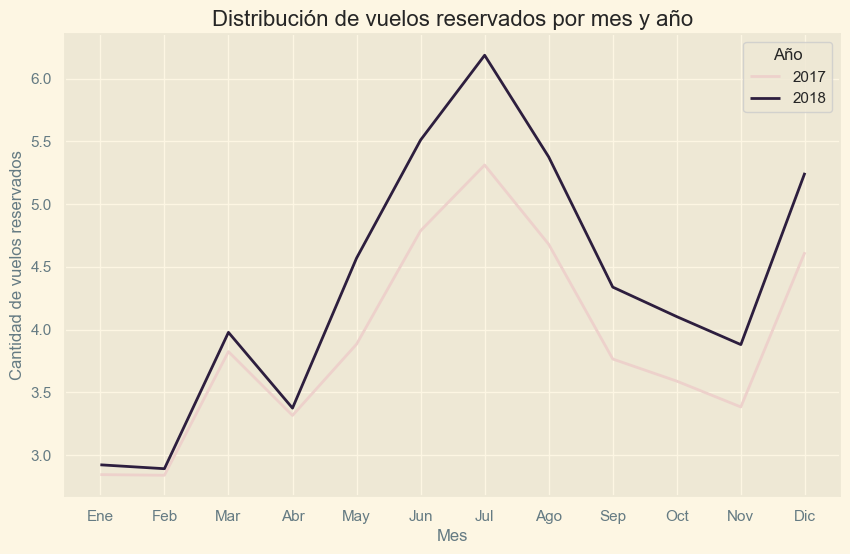

In [84]:
# Crear un gráfico de líneas para la distribución de vuelos reservados por mes para cada año
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Flights_Booked', hue='Year', ci=None)
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.title('Distribución de vuelos reservados por mes y año')
plt.legend(title='Año')

# Definir las etiquetas personalizadas para los meses
meses_labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(1, 13), labels=meses_labels)

plt.show()

> Se observa una **tendencia incremental de los vuelos totales así como de la magnitud de la estacionalidad** del año 2017 al año 2018. Estos datos confirmarían que 2019 fue el mes record de reservas de vuelos a nivel mundial hasta 2023 (tras la crisis del Covid, los valores descendieron drásticamente durante 2020 y 2021, siendo 2022 el año de recuperación y 2023 el año en que se igualaron e incluso superaron los datos de reservas de 2019).

> Del gráfico se  puede interpretar una **fuerte dependencia estacional del hemisferio norte**, siendo **Canadá** el país de estudio. De esta manera se observan tres períodos estacionales, por orden de magnitud:
   > - **Junio-Agosto (Verano)** los meses para los que más vuelos se reservan (vacaciones estivales).
   > - **Diciembre**: fin de año.
   > - **Mid-Term holidays** vacaciones de mitad de curso/Semana Santa en comunidades cristianas.

El patrón de las gráficas sigue la **distribución de Holt-Winters**, técnica de suavizado exponencial que considera tanto la tendencia como la estacionalidad de los datos. Se utiliza en previsión de patrones estacionales como los aquí mostrados.

In [85]:
# Calcular el total de vuelos reservados por mes y año
total_vuelos_por_mes = df.groupby(['Year', 'Month'])['Flights_Booked'].sum()

# Calcular el total de vuelos reservados en ambos años por mes
total_vuelos_por_mes_global = total_vuelos_por_mes.groupby('Month').sum()

# Calcular el porcentaje de vuelos reservados por mes en ambos años
porcentaje_por_mes = (total_vuelos_por_mes_global / total_vuelos_por_mes_global.sum()) * 100

# Suponiendo que 'porcentaje_por_mes' es tu DataFrame con los porcentajes de vuelos reservados por mes

# Formatear los valores del DataFrame para que aparezcan con %
porcentaje_por_mes_formatted = porcentaje_por_mes.apply(lambda x: f'{x:.2f}%')

porcentaje_por_mes_formatted

Month
1      5.81%
2      5.77%
3      7.86%
4      6.74%
5      8.52%
6     10.38%
7     11.59%
8     10.14%
9      8.17%
10     7.76%
11     7.32%
12     9.95%
Name: Flights_Booked, dtype: object

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

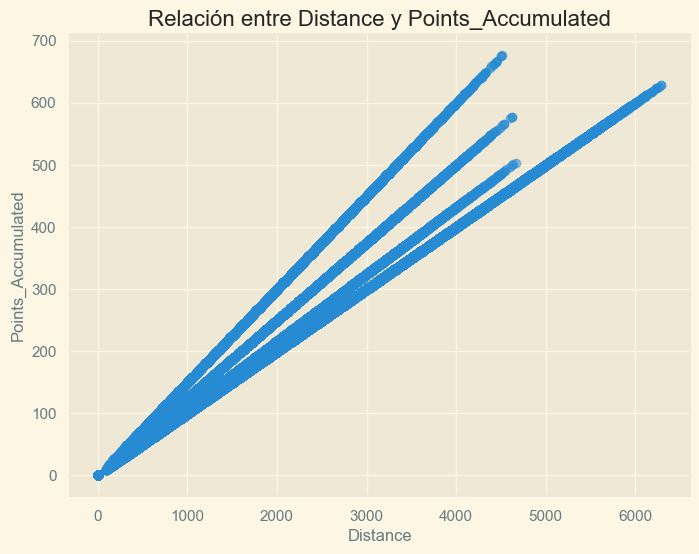

In [86]:
# Crear un gráfico de dispersión (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(df['Distance'], df['Points_Accumulated'], alpha=0.5)
plt.title('Relación entre Distance y Points_Accumulated')
plt.xlabel('Distance')
plt.ylabel('Points_Accumulated')
plt.grid(True)
plt.show()

Según los datos observados en la gráfica podemos deducir que ambas variables (Distancia y Puntos Acumulados) muestran una correlación fuerte creciente entre sí.

In [87]:
# Calcular la correlación entre las columnas 'Distance' y 'Points_Accumulated'
correlation = df['Distance'].corr(df['Points_Accumulated'])

print(f"La correlación entre 'Distance' y 'Points_Accumulated' es: {correlation}. \nEste valor es prácticamente 1, por lo que podemos identificar una correlación positiva fuerte, lo que significa que a medida que aumenta la distancia recorrida, aumentan los puntos acumulados.\n Esto puede ser debido a que los puntos acumulados se basan en la distancia recorrida por el vuelo.\n Del mismo modo se puede interpretar que cuantos más puntos acumula un usuario, mayor es la distancia recorrida en los vuelos reservados.")

La correlación entre 'Distance' y 'Points_Accumulated' es: 0.994545800565053. 
Este valor es prácticamente 1, por lo que podemos identificar una correlación positiva fuerte, lo que significa que a medida que aumenta la distancia recorrida, aumentan los puntos acumulados.
 Esto puede ser debido a que los puntos acumulados se basan en la distancia recorrida por el vuelo.
 Del mismo modo se puede interpretar que cuantos más puntos acumula un usuario, mayor es la distancia recorrida en los vuelos reservados.


### 3.¿Cuál es la distribución de los clientes por provincia o estado?

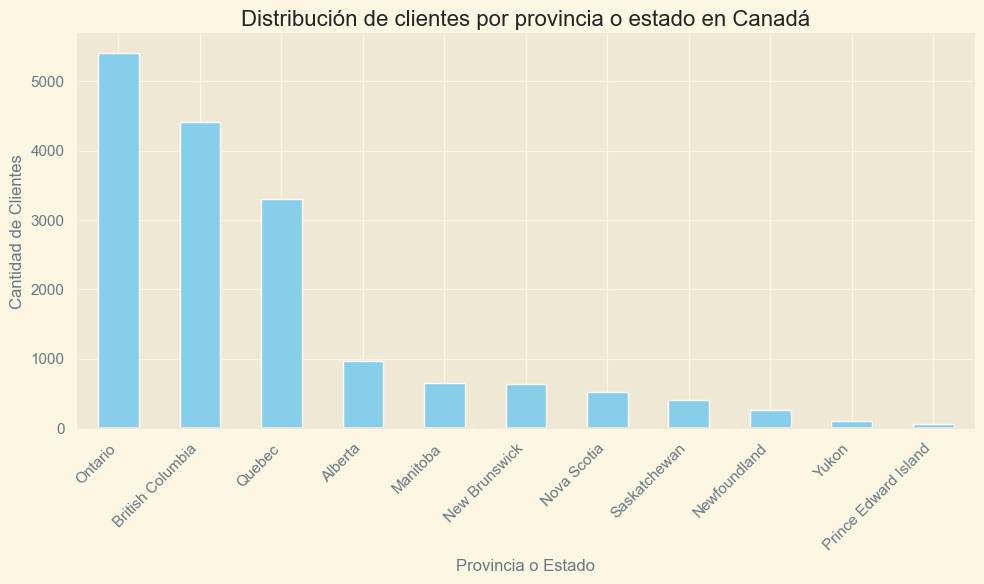

In [88]:
# Suponiendo que cada Loyalty Number pertenece a una persona distinta

# Contar la cantidad de clientes únicos por provincia
clientes_por_provincia = df.groupby('Province')['Loyalty_Number'].nunique().sort_values(ascending=False)

# Crear un gráfico de barras para mostrar la distribución de clientes por provincia
plt.figure(figsize=(10, 6))
clientes_por_provincia.plot(kind='bar', color='skyblue')
plt.title('Distribución de clientes por provincia o estado en Canadá')
plt.xlabel('Provincia o Estado')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()


Las provincias de Canadá que tienen mayor número de clientes de la muestra de tarjetas de fidelización son Ontario, seguido de British Columbia y Quebec. Ellas tres tienen más del 75% de los clientes según se muestra en el gráfico inferior, siendo menos del 25% la suma del resto de provincias.

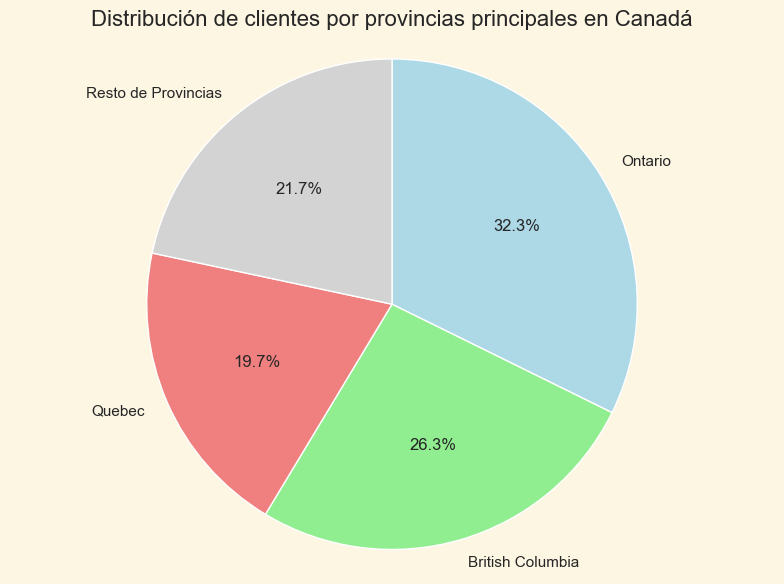

In [89]:
# Contar la cantidad de clientes únicos por provincia
clientes_por_provincia = df.groupby('Province')['Loyalty_Number'].nunique().sort_values(ascending=False)

# Obtener las tres principales provincias y sus cantidades
top_3_provincias = clientes_por_provincia.head(3)

# Calcular la suma de clientes en las tres principales provincias
suma_top_3 = top_3_provincias.sum()

# Calcular la cantidad de clientes en el resto de provincias
resto_provincias = clientes_por_provincia[~clientes_por_provincia.index.isin(top_3_provincias.index)].sum()

# Crear un diccionario con las cantidades de las tres principales provincias y "Resto de Provincias"
datos_pie = dict(top_3_provincias)
datos_pie['Resto de Provincias'] = resto_provincias

# Preparar datos y etiquetas para el gráfico
sizes = list(datos_pie.values())
labels = list(datos_pie.keys())

# Colores
colores = ['lightblue', 'lightgreen', 'lightcoral', 'lightgrey']

# Crear un gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colores, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribución de clientes por provincias principales en Canadá')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.tight_layout()
plt.show()


### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

> Según los datos analizados inicialmente, Vamos a analizar los Salarios de los clientes conocidos

> No tenemos datos de salario conocido para los usuarios de nivel de educación College, como se ve a continuación.

In [90]:
# y quieres filtrar las filas donde la columna 'Education' sea igual a 'College'
df_college = df[df['Education'] == 'College'][['Education', 'Salary']]

# Para obtener los salarios distintos en el nuevo DataFrame
salarios_distintos = df_college['Salary'].nunique()

print("Número de salarios distintos en el nuevo DataFrame:", salarios_distintos)
print(df_college)

Número de salarios distintos en el nuevo DataFrame: 0
       Education  Salary
24       College     NaN
25       College     NaN
26       College     NaN
27       College     NaN
28       College     NaN
...          ...     ...
403683   College     NaN
403684   College     NaN
403685   College     NaN
403686   College     NaN
403687   College     NaN

[102260 rows x 2 columns]


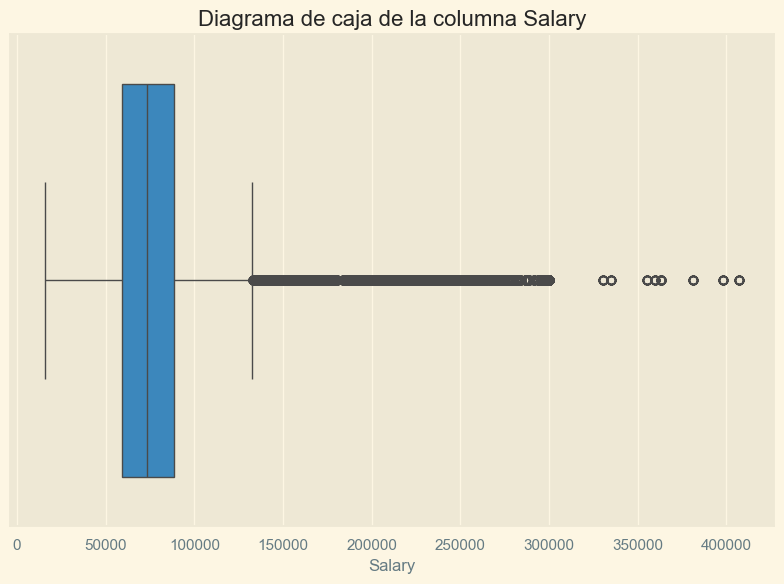

In [91]:
# Crear un diagrama de caja para la columna 'Salary'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Salary'])
plt.title('Diagrama de caja de la columna Salary')
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

> Según los datos mostrados en el diagrama, tenemos outliers.

Vamos a limpiar los outliers de la columna Salary antes de calcular salarios promedios.

In [92]:
# Analizamos los outliers la variable Salario de los Salarios conocidos

# Filtrar los datos para los salarios conocidos
df_known_salaries = df[df['Salary_Info'] == 'Known']

# Evaluar la presencia de outliers en la columna 'Salary' para salarios conocidos
Q1 = df_known_salaries['Salary'].quantile(0.25)
Q3 = df_known_salaries['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango intercuartílico para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar y limpiar los outliers en la columna 'Salary' para salarios conocidos
cleaned_salaries = df_known_salaries[(df_known_salaries['Salary'] >= lower_bound) & (df_known_salaries['Salary'] <= upper_bound)]

# Comparar el salario promedio entre diferentes niveles educativos
salario_promedio_por_educacion = df.groupby('Education')['Salary'].mean().sort_values()

print("Salario promedio por nivel educativo:")
print(salario_promedio_por_educacion)


Salario promedio por nivel educativo:
Education
High School or Below     61160.755016
Bachelor                 72667.474362
Master                  103734.523724
Doctor                  178403.675202
College                           NaN
Name: Salary, dtype: float64


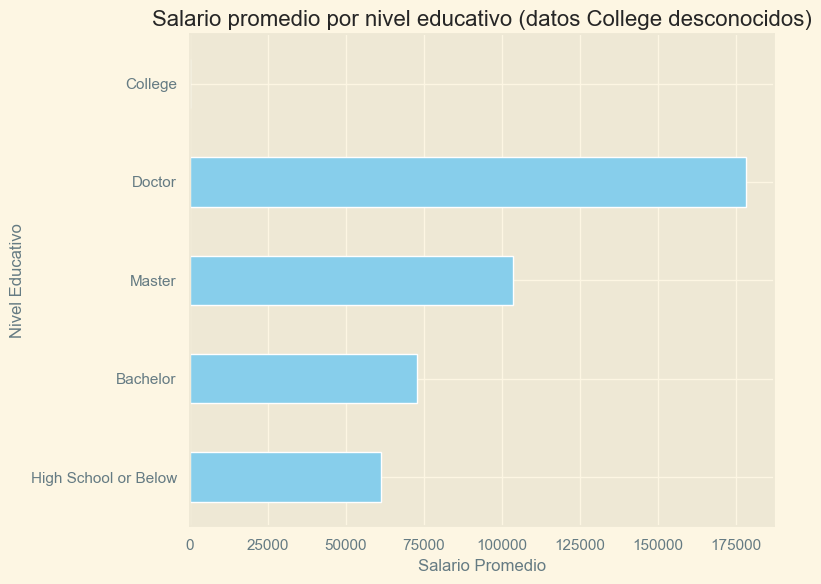

In [93]:
# Ordenar los datos del salario promedio por nivel educativo de mayor a menor
salario_promedio_por_educacion_sorted = salario_promedio_por_educacion.sort_values(ascending=True)

# Crear un gráfico de barras horizontales para mostrar el salario promedio por nivel educativo
plt.figure(figsize=(8, 6))
salario_promedio_por_educacion_sorted.plot(kind='barh', color='skyblue')
plt.title('Salario promedio por nivel educativo (datos College desconocidos)')
plt.xlabel('Salario Promedio')
plt.ylabel('Nivel Educativo')
plt.tight_layout()
plt.show()


> Del gráfico se desprende que los salarios más altos corresponden a niveles educativos Máster seguido de Doctor, mientras que los salarios más bajos corresponden a Bachelor y High School or Below.

### 5. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [94]:
# Inicialmente eliminamos duplicados de Loyalty Number para quedarnos con clientes únicos.

# Eliminar duplicados basados en 'Loyalty_Number'
df_unique_customers = df.drop_duplicates(subset='Loyalty_Number')

# Contar la distribución de clientes por género y estado civil
distribution = df_unique_customers.groupby(['Gender', 'Marital_Status']).size().unstack()

print("Distribución de clientes por género y estado civil:")
print(distribution)


Distribución de clientes por género y estado civil:
Marital_Status  Divorced  Married  Single
Gender                                   
Female              1269     4869    2272
Male                1249     4866    2212


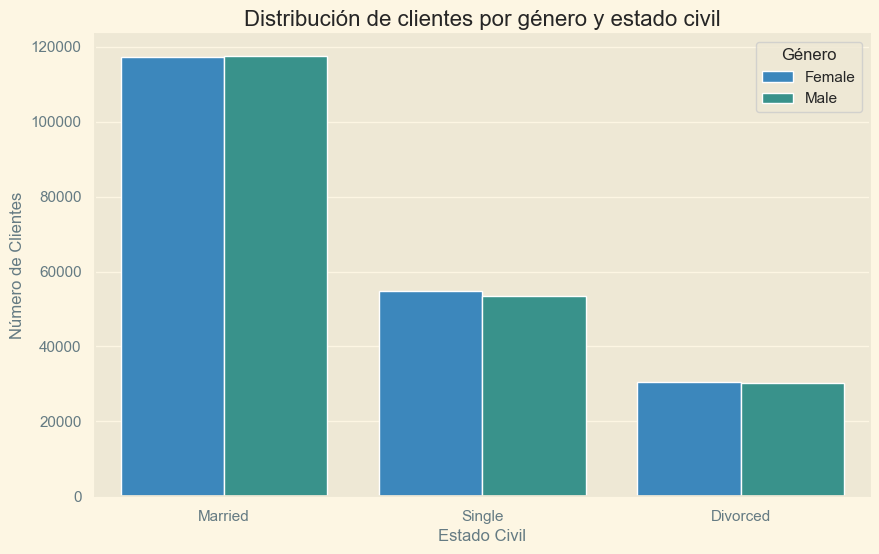

In [95]:
# Crear un gráfico de conteo combinado
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', hue='Gender')
plt.title('Distribución de clientes por género y estado civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.legend(title='Género')
plt.show()


> Según los datos mostrados, no hay diferencias significativas de la distribución de clientes por estado civil según su género.

# Fase III: 
# Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Evaluar si existen diferencias significativas en el número de **vuelos reservados** según el **nivel educativo** de los clientes. 

> *Assumption_3*: Cada tarjeta "Loyalty_Number" pertenece a una persona diferente de nuestra muestra.

In [96]:
# En primer lugar, vamos a totalizar Vuelos totales en estos 2017 y 2018, para cada cliente (Loyalty_Number)
# Sumar los Total Flights por cada Loyalty Number
df_total_flights_per_customer = df.groupby('Loyalty_Number')['Total_Flights'].sum().reset_index()

# Ahora creamos un df sólo con los datos de Education y Loyalty Number
# Crear un DataFrame con registros únicos de 'Loyalty_Number' y 'Education'
df_loyalty_number_education = df[['Loyalty_Number', 'Education']].drop_duplicates()

# Unir ambos df por la columna común 'Loyalty_Number'
df_flights_education = pd.merge(df_total_flights_per_customer, df_loyalty_number_education, on='Loyalty_Number', how='inner')

# Visualizamos las principales estadísticas descriptivas
df_flights_education.groupby('Education')['Total_Flights'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,10475.0,123.956754,67.811813,0.0,73.0,142.0,173.0,448.0
College,4238.0,125.914582,67.645917,0.0,78.0,141.0,175.0,399.0
Doctor,734.0,125.652589,69.936732,0.0,73.0,144.0,177.0,359.0
High School or Below,782.0,126.383632,68.540416,0.0,79.0,145.5,174.0,336.0
Master,508.0,127.076772,67.682896,0.0,82.0,142.0,175.0,400.0


### A/B Testing

<span style="color:#D4AF37"> **Hipótesis nula H0**</span>: No existe diferencia significativa entre la cantidad promedio de vuelos reservados los usuarios en función de su nivel educativo.

<span style="color:#D4AF37"> **Hipótesis alternativa H1**</span>: Existe diferencia significativa entre la cantidad promedio de vuelos reservados por los usuarios en función de su nivel educativo.

> Creamos <span style="color:#D4AF37">grupo control de menor nivel de estudios</span>, agrupando: High School or Below, Bachelor

> Creamos el <span style="color:#D4AF37"> grupo test de mayor nivel de estudios</span>, agrupando: College, Master, Doctor

In [98]:
# Función para asignar los grupos educativos
def assign_educational_group(education):
    if education in ['High School or Below', 'Bachelor']:
        return 'Low'
    else:
        return 'High'

# Crear la nueva columna 'Educational_Group' basada en la columna 'Education'
df_flights_education['Educational_Group'] = df_flights_education['Education'].apply(lambda x: assign_educational_group(x))

# Mostrar las primeras filas del DataFrame con la nueva columna
df_flights_education.head()


,Loyalty_Number,Total_Flights,Education,Educational_Group
0,100018,192,Bachelor,Low
1,100102,215,College,High
2,100140,190,College,High
3,100214,96,Bachelor,Low
4,100272,163,Bachelor,Low


In [101]:
# Verificar el número de muestras en cada grupo
df_flights_education['Educational_Group'].value_counts()


Educational_Group
Low     11257
High     5480
Name: count, dtype: int64

> Tenemos el doble de datos en bajo nivel educativo que en alto nivel educativo.

In [106]:
# creamos una clase para realizar todos los cálculos a la vez

# Crear la clase Data_Analysis
class Data_Analysis:
    @staticmethod
    def normalidad(dataframe, columna, grupo):
        statistic, p_value = stats.shapiro(dataframe[columna])
        if p_value > 0.05:
            print(f"Para el grupo '{grupo}', los datos en la columna '{columna}' siguen una distribución normal.")
            print(f'{grupo}')
        else:
            print(f"Para el grupo '{grupo}', los datos en la columna '{columna}' no siguen una distribución normal.")
            print(f'{grupo}')


    @staticmethod
    def visualizar_matriz_correlacion(dataframe, nombre_columna_grupo):
        # Filtrar el DataFrame para cada grupo
        control_group = dataframe[dataframe[nombre_columna_grupo] == 'Low']
        test_group = dataframe[dataframe[nombre_columna_grupo] == 'High']

        # Calcular la matriz de correlación para cada grupo
        correlacion_matrix_grupo1 = control_group.corr(numeric_only=True)
        correlacion_matrix_grupo2 = test_group.corr(numeric_only=True)

        # Crear el heatmap para cada grupo
        sns.heatmap(correlacion_matrix_grupo1, annot=True, cmap="cubehelix", fmt=".2f")
        plt.title(f"Matriz de Correlación para grupo Low")
        plt.show()

        sns.heatmap(correlacion_matrix_grupo2, annot=True, cmap="cubehelix", fmt=".2f")
        plt.title(f"Matriz de Correlación para grupo High")
        plt.show()

    @staticmethod
    def prueba_chi_cuadrado(dataframe, columna1, columna2):
        contingency_table = pd.crosstab(dataframe[columna1], dataframe[columna2])
        chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
        print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")
    
    
    @staticmethod

    def prueba_t(dataframe, nombre_columna_grupo, columna_prueba):
        # Filtrar el dataframe para obtener el grupo de control y el grupo de prueba
        control_group = dataframe[dataframe[nombre_columna_grupo] == 'Low'][columna_prueba]
        test_group = dataframe[dataframe[nombre_columna_grupo] == 'High'][columna_prueba]
        
        # Realizar la prueba t de independencia
        t_stat, p_ttest = ttest_ind(control_group, test_group, equal_var=False)  # Se asume varianzas no iguales
        
        # Imprimir el resultado
        print(f"Prueba t para la evaluar el número de vuelos totales reservados por educación baja y alta arroja un p-valor: {p_ttest}")



Para el grupo 'Low', los datos en la columna 'Total_Flights' no siguen una distribución normal.
Low
Para el grupo 'High', los datos en la columna 'Total_Flights' no siguen una distribución normal.
High


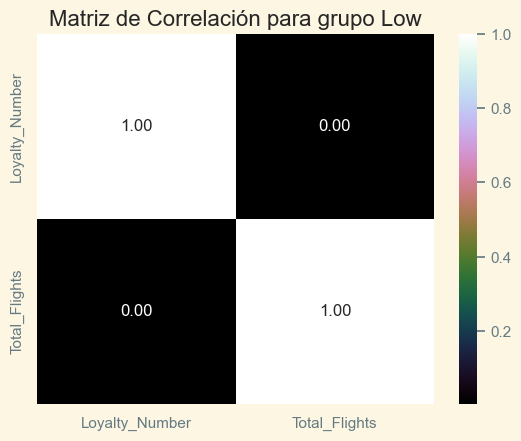

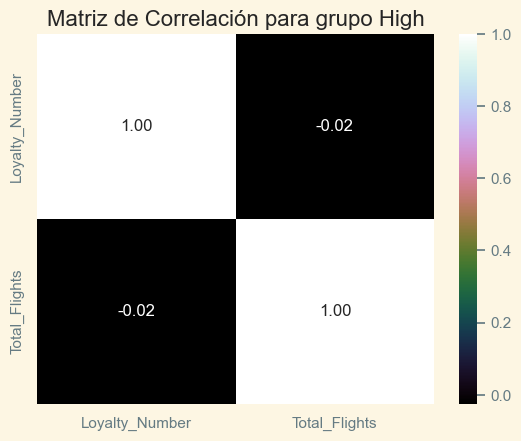

Prueba de Chi-cuadrado - p-valor: 0.40135416426485443
Prueba t para la evaluar el número de vuelos totales reservados por educación baja y alta arroja un p-valor: 0.09609535897141697


In [108]:
# Aplicamos las funciones de la clase a nuestros datos

# Filtrar por grupos 'Low' y 'High'
df_low = df_flights_education[df_flights_education['Educational_Group'] == 'Low']
df_high = df_flights_education[df_flights_education['Educational_Group'] == 'High']

# Instanciar la clase Data_Analysis
analisis = Data_Analysis()

# Ejecutar cada función de la clase Data_Analysis con los datos filtrados
analisis.normalidad(df_flights_education, 'Total_Flights', 'Low')
analisis.normalidad(df_flights_education, 'Total_Flights', 'High')





analisis.visualizar_matriz_correlacion(df_flights_education, 'Educational_Group')

analisis.prueba_chi_cuadrado(df_flights_education, 'Educational_Group', 'Total_Flights')

# Llamar a la función con los parámetros adecuados
analisis.prueba_t(df_flights_education, 'Educational_Group', 'Total_Flights')
